In [12]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm

In [13]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   avatar_url                    3075 non-null   object             
 1   city                          1391 non-null   object             
 2   comments_count                3075 non-null   int64              
 3   country_code                  1298 non-null   object             
 4   created_at                    3075 non-null   datetime64[ns, UTC]
 5   description                   1156 non-null   object             
 6   first_name                    1989 non-null   object             
 7   followers                     2352 non-null   object             
 8   followers_count               3075 non-null   int64              
 9   followings                    2164 non-null   object             
 10  followings_count              3075 n

In [51]:
df['created_at'] = pd.to_datetime(df['created_at']) # convert string data to datetime object
dict(df['created_at'].dt.year.value_counts())

{2016: 358,
 2011: 293,
 2018: 273,
 2015: 269,
 2012: 263,
 2019: 255,
 2017: 247,
 2014: 245,
 2020: 225,
 2013: 218,
 2010: 190,
 2021: 129,
 2009: 78,
 2008: 29,
 2007: 3}

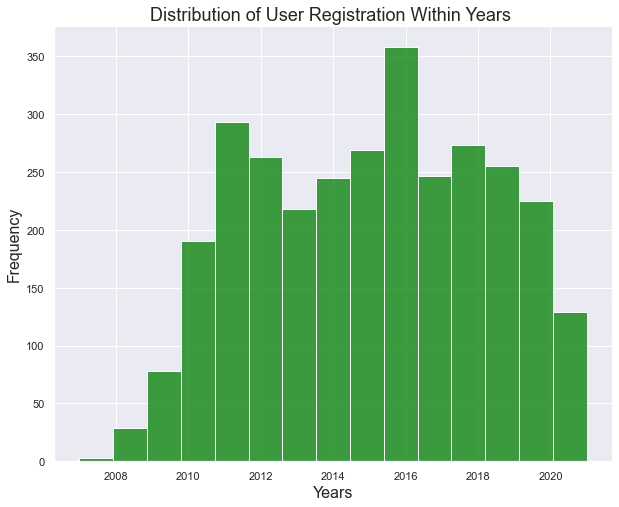

<Figure size 720x576 with 0 Axes>

In [58]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='green', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution of User Registration Within Years ', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

#### Nhận xét: 
+ Sử dụng trường created_at: chứa chuỗi thông tin ngày tháng năm và thời gian tạo tài khoản của user
    + Không có trường dữ liệu bị thiếu
    + Các trường không có biểu hiện khác thường
- Ý nghĩa biểu đồ:
    + Chọn boxplot vì loại biểu đồ này thể hiện được 5 đại lượng quan trọng của trường đơn biến created_at: giá   trị nhỏ nhất (min), tứ phân vị thứ nhất (Q1), trung vị (median), tứ phân vị thứ 3 (Q3) và giá trị lớn nhất (max).
    + Dữ liệu có xu hướng cân bằng tại giá trị trung vị. Không có outliers 

______________________________________

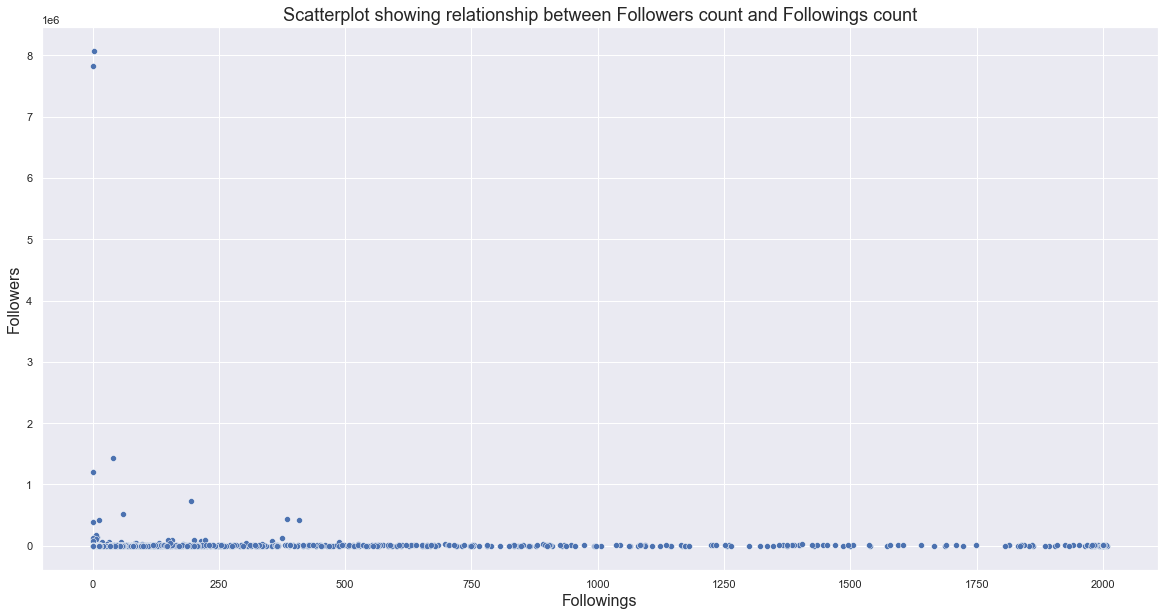

<Figure size 1440x720 with 0 Axes>

In [71]:
sns.set_style('darkgrid');
sns.set(rc={'figure.figsize':(20,10)})
p = sns.scatterplot(x=df['followings_count'],y=df['followers_count'])
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Followings', fontsize=16)
plt.ylabel('Followers', fontsize=16)
plt.title('Scatterplot showing relationship between Followers count and Followings count', fontsize=18)
plt.show()
plt.clf()

#### Nhận xét:
- Câu hỏi: Liệu có phải một user có lượng theo dõi các user khác (following) cao, cũng có lượng người theo dõi (follower) cao tương ứng?
- Sử dụng trường followers_count và followings_count: lưu số lượng người dùng mà user đang theo dõi và số lượng người dùng đang theo dõi user đó.
- Không có trường dữ liệu bị thiếu. Các trường không có biểu hiện khác thường (hai trường đều là kiểu int64)
- Ý nghĩa biểu đồ:
    + Chọn kdeplot vì loại biểu đồ này thể hiện mật độ 
    + Dữ liệu có xu hướng cân bằng tại giá trị trung vị. Không có outliers 

    + Trước khi plot biểu đồ thì bạn nghĩ câu trả lời cho câu hỏi là gì? Sau khi plot biểu đồ thì bạn nhận ra mình đã đúng/sai chỗ nào?


_______________________________________

In [7]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [9]:
df_corr = df[['likes_count','reposts_count','track_count']]

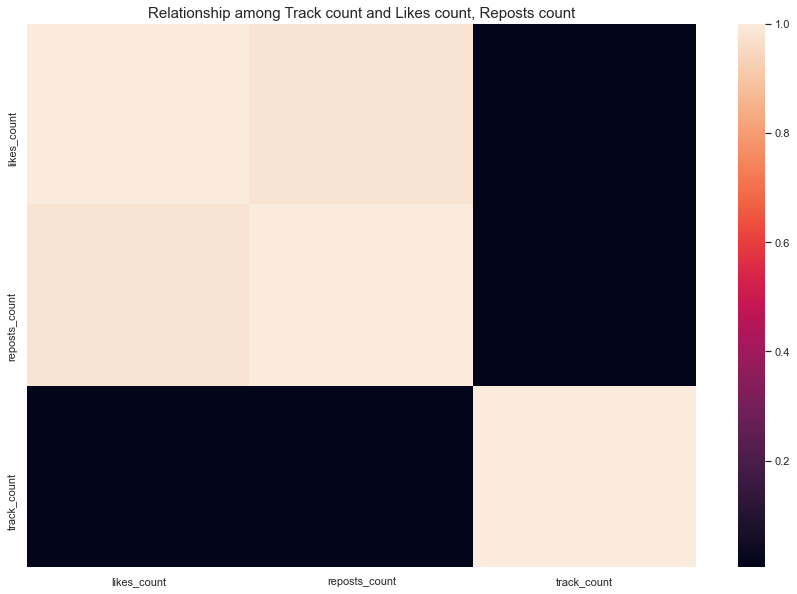

In [10]:
sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Track count and Likes count, Reposts count",size = 15)
plt.show()

#### Nhận xét:
- Câu hỏi: Một playlist có số lượng bài hát (track_count)
- Sử dụng trường followers_count và followings_count: lưu số lượng người dùng mà user đang theo dõi và số lượng người dùng đang theo dõi user đó.
- Không có trường dữ liệu bị thiếu. Các trường không có biểu hiện khác thường (hai trường đều là kiểu int64)
- Ý nghĩa biểu đồ:
    + Chọn kdeplot vì loại biểu đồ này thể hiện mật độ 
    + Dữ liệu có xu hướng cân bằng tại giá trị trung vị. Không có outliers 

    + Trước khi plot biểu đồ thì bạn nghĩ câu trả lời cho câu hỏi là gì? Sau khi plot biểu đồ thì bạn nhận ra mình đã đúng/sai chỗ nào?
